<a href="https://colab.research.google.com/github/JilsyXavier/Employee-Retention---Random-Forest-Classifier/blob/main/Google_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Retention: Providing data-driven suggestions for HR**

## Background Salifort Motors

This project is to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees.
As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Now we want to analyze the survey data and come up with ideas for how to increase employee retention.


# **PACE stages**


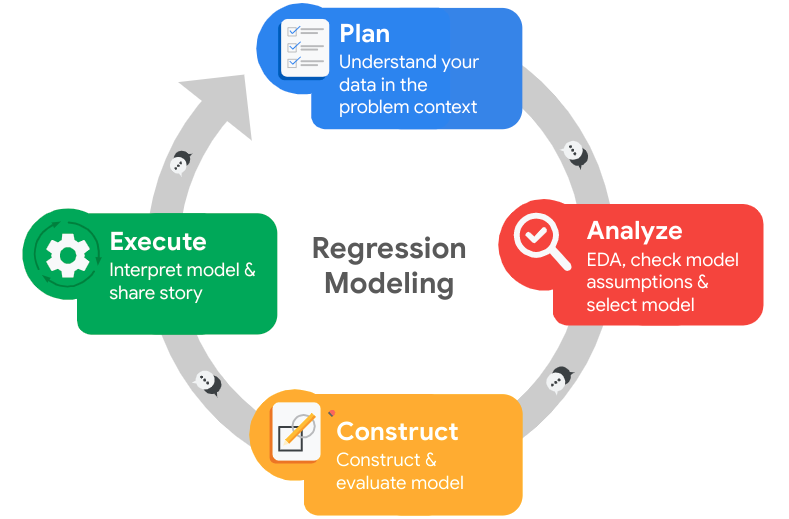

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that will be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## **Step 1. Imports**

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
#for data manipulation
import pandas as pd
import numpy as np

#forr visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For data modeling
!pip install xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# For evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:


# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **Step 2. Data Exploration (Initial EDA and data cleaning)**

- Understand your variables
- Clean dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df0.isna().sum()


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates

df0.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


With several continuous variables across 10 columns, it seems very unlikely that these observations(duplications) are legitimate. so we can proceed by dropping them.

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep ='first')

# Display first few rows of new dataframe as needed

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#rechek duplicates
df1.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

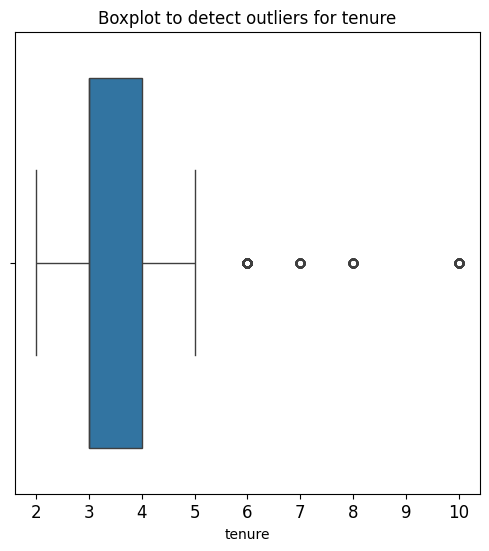

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()


In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# **pAce: Analyze Stage**
- Perform EDA (analyze relationships between variables)



We have no missing values, but have some duplicates around 20% of data which is not seem to be legimate. Since we have some continuous variables in data ,its unlikely to be same data for two employees

## **Step 2. Data Exploration (Continue EDA)**

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize =True)*100)


left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### **Data visualizations**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

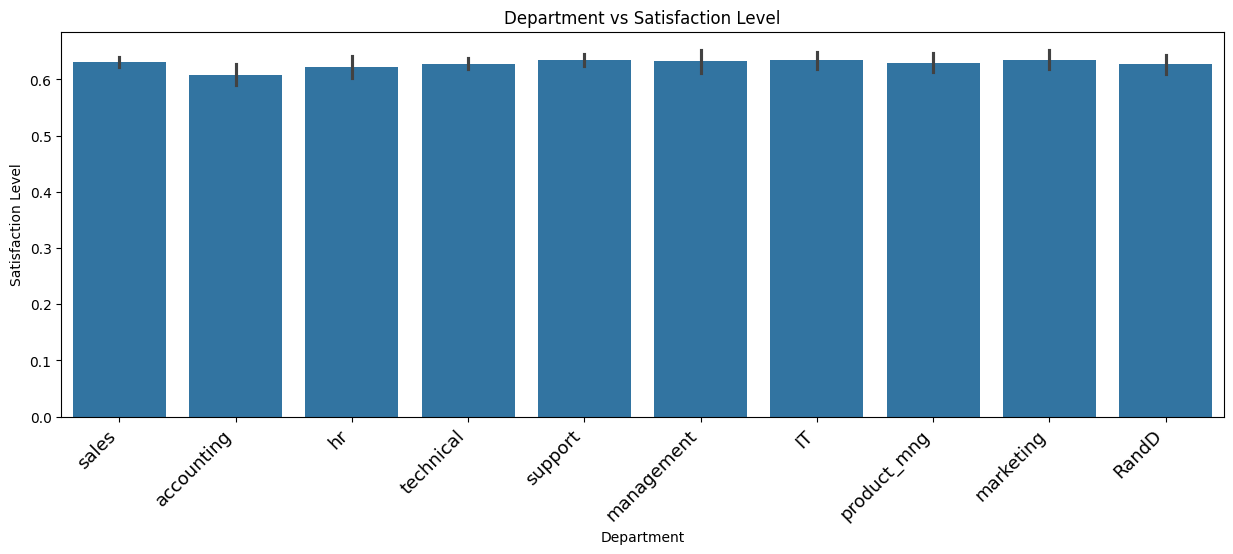

In [ ]:
# Create a plot as 'department' vs 'satisfaction'
plt.figure(figsize =(15,5))
sns.barplot(x =df1['department'],y=df1['satisfaction_level'])
plt.title('Department vs Satisfaction Level')
plt.xlabel("Department")
plt.ylabel("Satisfaction Level")
plt.xticks(rotation =45,horizontalalignment ='right',fontsize =13)

Satisfaction level of employees consistent accorss departments and its around 0.6

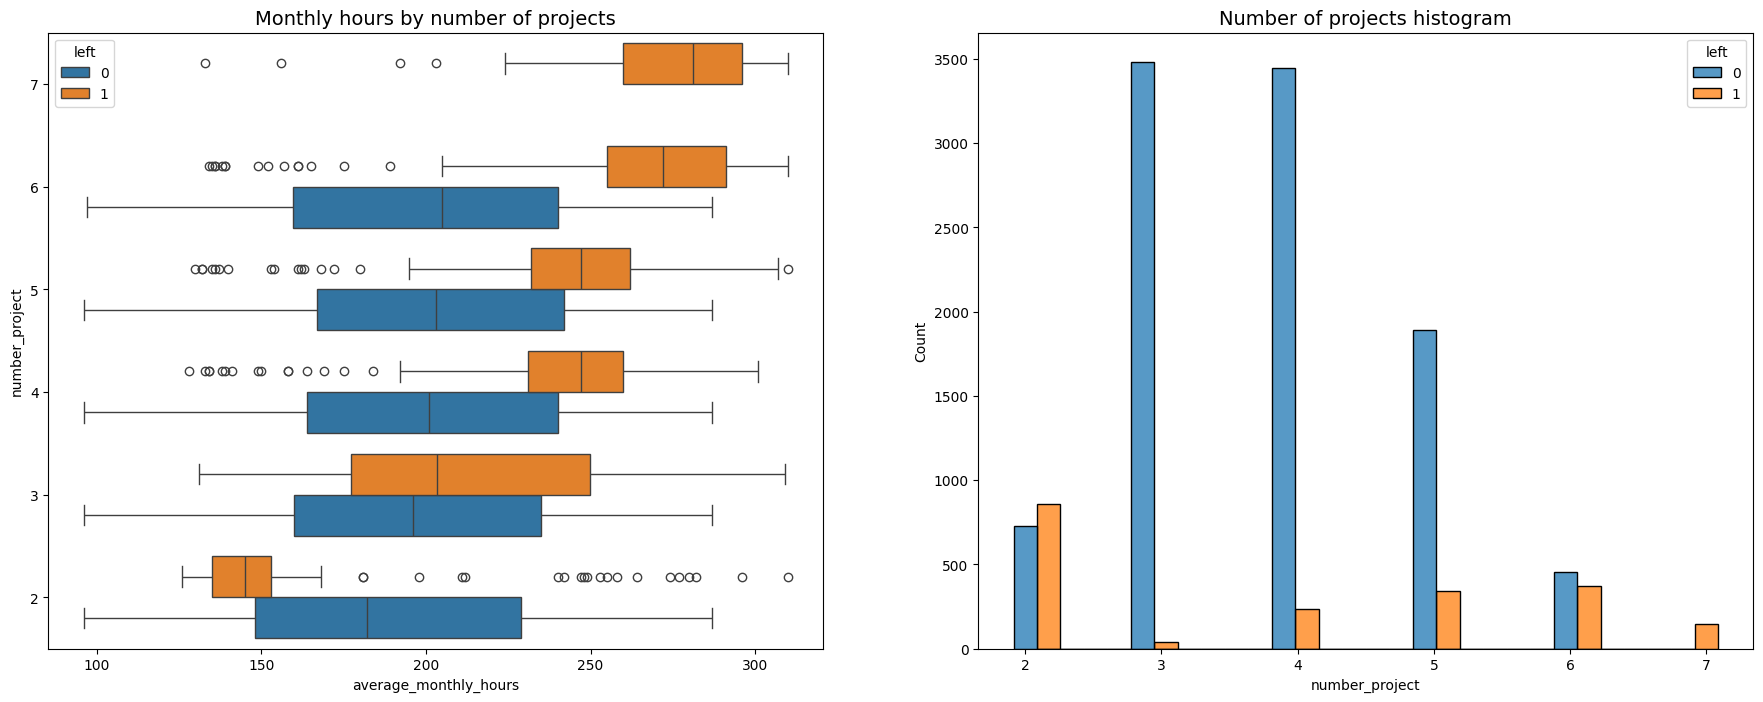

In [ ]:
# Create a boxplot as average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')


# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company:
  (A) those who worked considerably less than their peers with the same number of projects,

  (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group    includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door.
For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

we want to more focus onto the salary and other promotion details of group B


2. Everyone with seven projects left the company, and the average monthly hours taken by them ~255–295 hours/month—much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3–4 and there is only a negligible number of left employees .

4. Average number of weeks in a month is 4.

   Average working hours for an employee in a weeks is ~40 hours/week
   
   So average working hours for an employee per month will be 40 * 4 = 160 hours per month
   
   But here the most of the employees worked above 160 hours, some stayed - have to analyse the features
   
   Most of the employees left also come to this category

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

,count
left,
1,145


This confirms that all employees with 7 projects did leave.

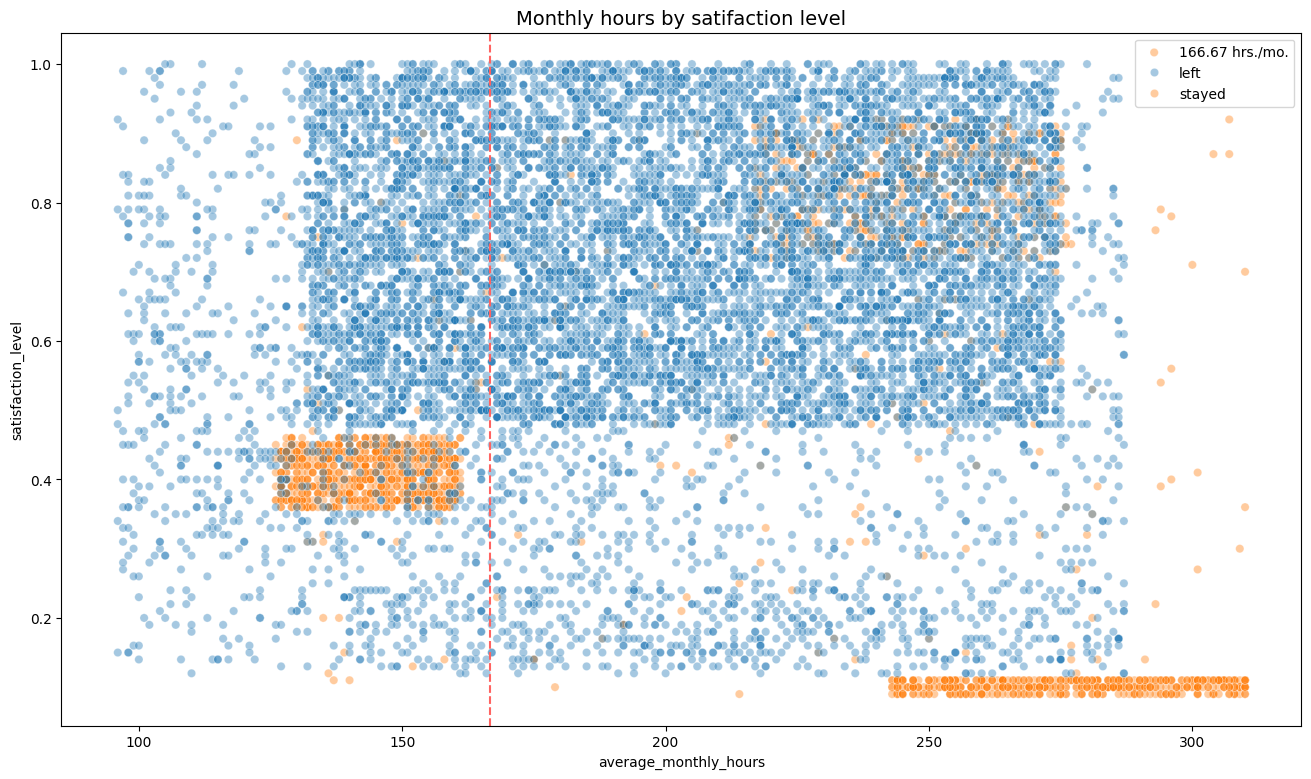

In [ ]:

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satifaction level', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

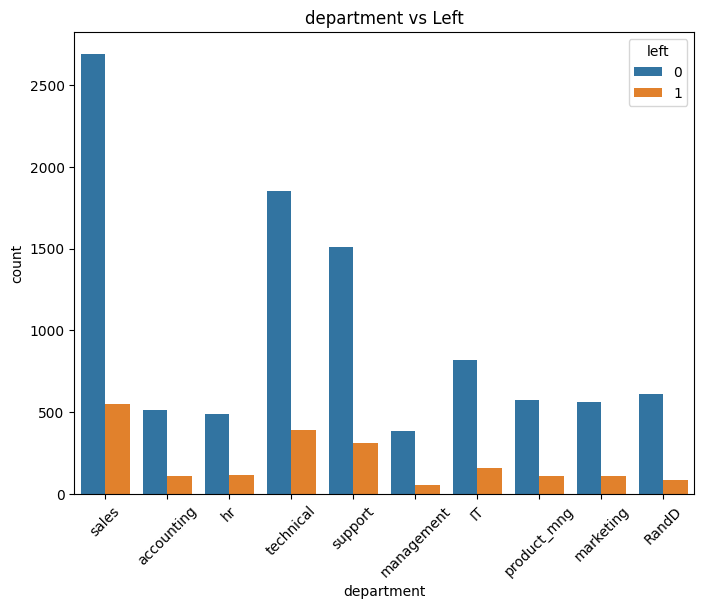

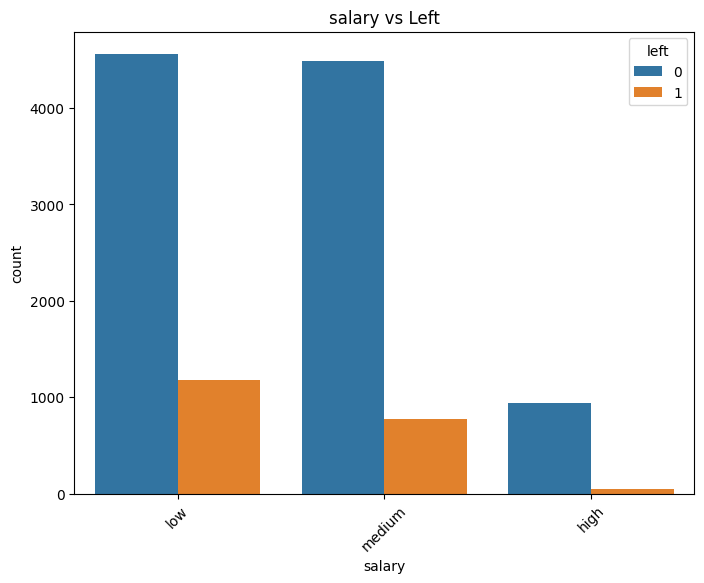

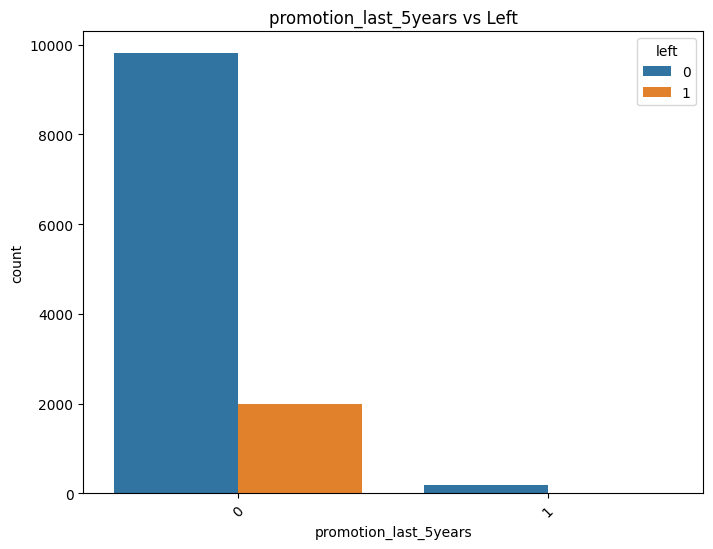

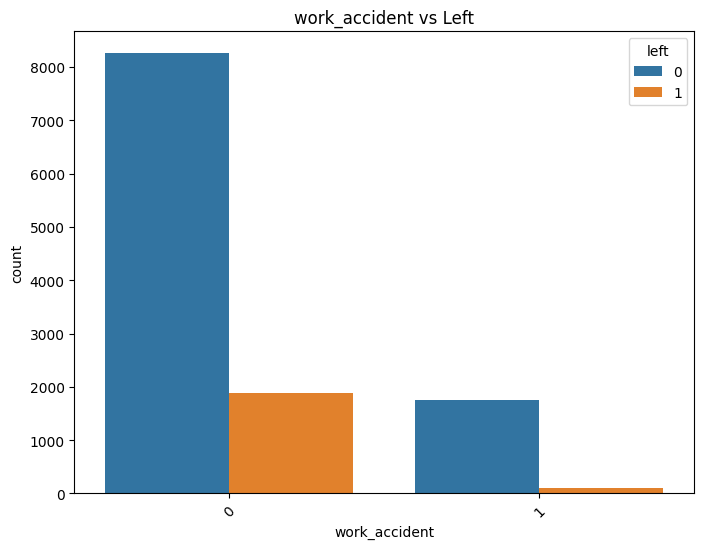

In [ ]:
# Create a plot as needed
categorical_features = ['department', 'salary', 'promotion_last_5years', 'work_accident']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='left', data=df1)
    plt.title(f'{feature} vs Left')
    plt.xticks(rotation =45)
    plt.show()


* The departments with high number of employees who left are Sales,Support and Management respectively
* Salary and promotion showing a trend as expected; same level and low salary prone to left,But still the ~80% of employees in the company are in low to medium salary

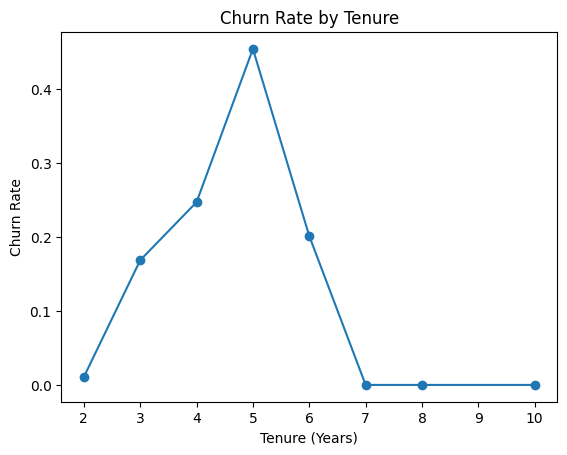

In [ ]:
# Create a plot as needed
churn_rate = df1.groupby('tenure')['left'].mean()
churn_rate.plot(kind='line', marker='o')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate')
plt.show()

It seems to be the churn rate slightly increasing from 2 year and reach at peak at 5 years and slow down.Then go steadily at low from 7 years.

The employees from 2 - 5 years of tenure need more care.Especialy for 5 year.Since there is chances of being left for other better oppurtunities.

<Figure size 1200x800 with 0 Axes>

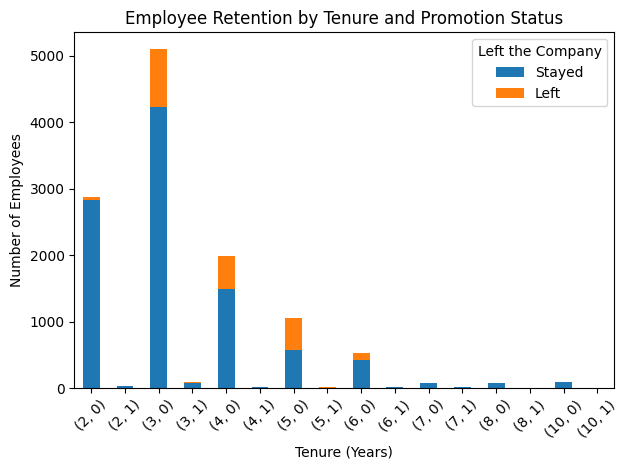

In [ ]:
# Create a plot as needed

# Count the number of employees who left or stayed by tenure and promotion status
stacked_data = df1.groupby(['tenure', 'promotion_last_5years', 'left']).size().unstack(fill_value=0)

# Create a figure with a specific size
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Employee Retention by Tenure and Promotion Status')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Left the Company', labels=['Stayed', 'Left'])
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

3 -6 years without promotion shows a tendency to leave the company

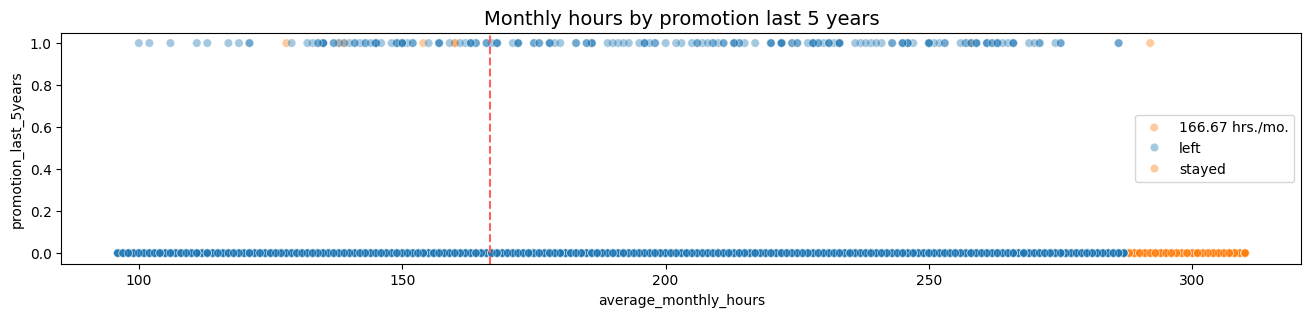

In [ ]:

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

very few employees who were promoted in the last five years left

very few employees who worked the most hours were promoted

all of the employees who left were working the longest hours

### Insights

* Satisfaction level of employees consistent accorss departments and its around 0.6
* There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects,(B) those who worked much more.
* Everyone with seven projects left the company, and the average monthly hours taken by them ~255–295 hours/month—much more than any other group.
* The optimal number of projects for employees to work on seems to be 3–4 and there is only a negligible number of left employees .
* The average working hours for an employee per month will be 40 * 4 = 160 hours per month.But here the most of the employees worked above 160 hours, some stayed - have to analyse the features.Most of the employees left also come to this category
* The departments with high number of employees who left are Sales,Support and Management respectively.
* Salary and promotion showing a trend as expected; same level and low salary prone to left,But still the ~80% of employees in the company are in low to medium salary
* It seems to be the churn rate slightly increasing from 2 year and reach at peak at 5 years and slow down.Then go steadily at low from 7 years.
* The employees from 2 - 5 years of tenure need more care.Especialy for 5 year.Since there is chances of being left for other better oppurtunities.
* 3 -6 years without promotion shows a tendency to leave the company
* very few employees who worked the most hours were promoted
* There was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.
* Another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.
* There is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.


#### **It appears that employees are leaving the company as a result of poor management. Leaving is tired to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at the company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.**

# **paCe: Construct Stage**
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## **Model assumptions**

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## **Step 3. Model Building, Step 4. Results and Evaluation**
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable  want to predict (whether an employee leaves the company) is categorical, can either build a Logistic Regression model, or a Tree-based Machine Learning model.

To bring a model with high performance ,I decided to go with both models .And then choose the champion model by evaluation

## **Modeling**

### **Logistic Regression - Model 1**

Encode the categorical variable

In [ ]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc=pd.get_dummies(df_enc,['department'],drop_first =False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


#### Check for Multicollinearity

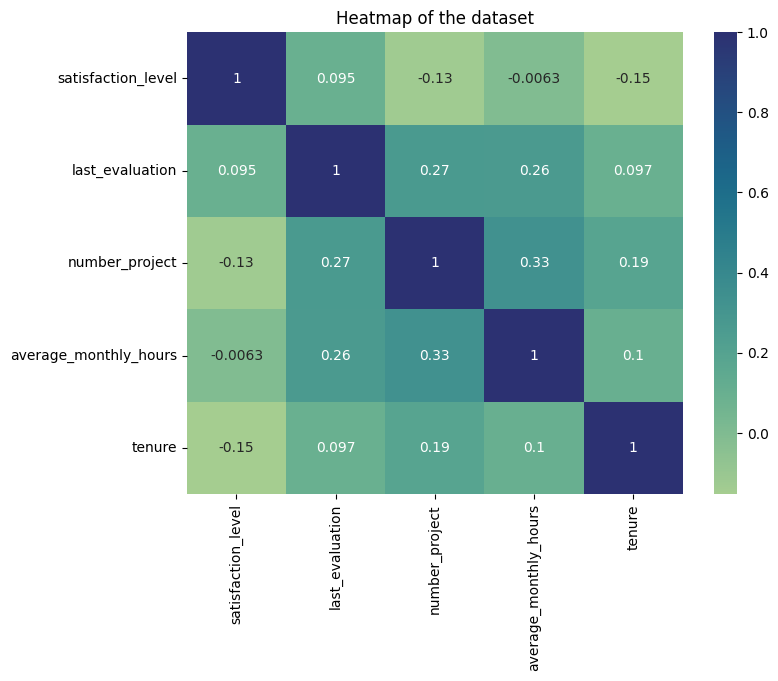

In [ ]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

#### Remove Outliers

In [ ]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logistic = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logistic.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


#### Spliting Dataset

In [ ]:
#seperate x and y variables
y = df_logistic['left']
x = df_logistic.drop('left',axis =1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [ ]:
#split train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,stratify = y,random_state =42)

In [ ]:
#shape of each df
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8933, 18), (2234, 18), (8933,), (2234,))

#### **Build Model**

In [ ]:
#instantiate the model
clf = LogisticRegression(random_state =42,max_iter =500)

#fit the model to train data
log_model = clf.fit(x_train,y_train)


In [ ]:
#predict using model
y_pred = log_model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

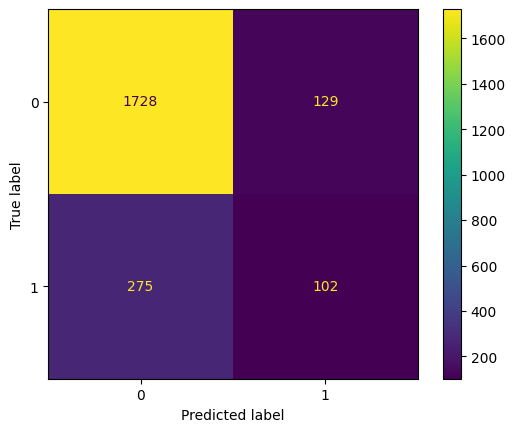

In [ ]:
#confusion matrix to visualize the result from the logistic model
cm_log = confusion_matrix(y_test,y_pred,labels = log_model.classes_)

#display of confusion matrix
disp_log = ConfusionMatrixDisplay(confusion_matrix =cm_log,display_labels = log_model.classes_)

#show the display
disp_log.plot()

The upper-left quadrant displays the number of true negatives.Here it is the employees who didnot leave the company

The upper-right quadrant displays the number of false positives.Here it is the employees predicted as left when they don't

The bottom-left quadrant displays the number of false negatives.Here it is the employees predicted as stayed when they left

The bottom-right quadrant displays the number of true positives.Here it is the employees who leave the company

We have to evaluate the all scores especially the precision score ,since we want to predict correctly the employees who going to left rather than who stayed.And also because the data is slightly imbalanced

In [ ]:
#classification report to evaluate the model
target_name = ['Stayed','left']
print(classification_report(y_test,y_pred,target_names = target_name))

              precision    recall  f1-score   support

      Stayed       0.86      0.93      0.90      1857
        left       0.44      0.27      0.34       377

    accuracy                           0.82      2234
   macro avg       0.65      0.60      0.62      2234
weighted avg       0.79      0.82      0.80      2234



The  precision score is 79%  ,  recall score is 82% ,  f1-score is 80% and accuracy of 82 %.But we have to predict the employees who leave, then the scores are significantly lower

### **Tree Based Models - Model 2**

In [ ]:
#seperate x and y
y = df_enc['left']
x = df_enc.drop('left',axis =1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [ ]:
#split train and test set
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.20,stratify = y,random_state =0)

In [ ]:
#shape of each df
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9592, 18), (2399, 18), (9592,), (2399,))

### **Decision Tree**

In [ ]:
#instantiate the classifier
Tree = DecisionTreeClassifier(random_state = 0)
#hyperparameters
cv_params = {'max_depth':[4,6,8,None],'min_samples_leaf':[2,3,5,1],'min_samples_split':[4,6,8]}
scoring = ['accuracy','precision','recall','f1','roc_auc']

#instantiate gridsearch
Tree_cv = GridSearchCV(Tree,cv_params,scoring = scoring,cv=4,refit ='roc_auc')

In [ ]:
%%time
#fit the model
Tree_cv.fit(x_train,y_train)

CPU times: user 5.61 s, sys: 3.39 ms, total: 5.61 s
Wall time: 5.59 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 3, 5, 1],
                         'min_samples_split': [4, 6, 8]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
#best parameters
Tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [ ]:
#best score
Tree_cv.best_score_

0.9710926810117475

97% is a strong roc_auc score with which the model can predict the employees who leave

In [ ]:
def make_results(model_name: str, model_object, metric: str) -> pd.DataFrame:
    '''
    Arguments:
        model_name (string): The name for the model in the output table
        model_object: A fitted GridSearchCV object
        metric (string): The metric to evaluate ('precision', 'recall', 'f1', 'accuracy', or 'roc_auc')

    Returns:
        pd.DataFrame: DataFrame with precision, recall, f1, accuracy, and roc_auc scores for the model with the best mean metric score
    '''

    # Metric mapping
    metric_dict = {
        'roc_auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    # Ensure the metric is valid
    if metric not in metric_dict:
        raise ValueError(f"Invalid metric '{metric}'. Choose from {list(metric_dict.keys())}.")

    # Convert cv_results_ to DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Find the row with the best score for the specified metric
    best_results = cv_results.loc[cv_results[metric_dict[metric]].idxmax()]

    # Extract scores
    scores = {
        'model': model_name,
        'precision': best_results.get('mean_test_precision', None),
        'recall': best_results.get('mean_test_recall', None),
        'F1': best_results.get('mean_test_f1', None),
        'accuracy': best_results.get('mean_test_accuracy', None),
        'roc_auc': best_results.get('mean_test_roc_auc', None)
    }

    # Create and return DataFrame
    return pd.DataFrame([scores])

In [ ]:
#all evaluvation scores
decision_tree_results = make_results('Decision Tree Round 1',Tree_cv,'roc_auc')
decision_tree_results

,model,precision,recall,F1,accuracy,roc_auc
0,Decision Tree Round 1,0.926282,0.917764,0.921857,0.974145,0.971093


All of these scores from the decision tree model are strong indicators of good model performance.

Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions.

### **Random Forest**

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring= {
         'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'}

# Instantiate GridSearch
rf_cv= GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
#fit the model
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# Define a path to the folder where want to save the model
path = "C:/Users/jilsy/google/"

In [ ]:
import os
import pickle # Import the pickle module

def write_pickle(path, model_object, save_as):
    '''
    Save the model object as a pickle file.

    path: str : The directory path to save the pickle file.
    model_object: object : The model or object to be saved.
    save_as: str : The filename to save the pickle file as.
    '''
    # Construct the full file path
    full_path = os.path.join(path, save_as + '.pickle')

    # Print the full path to verify
    print(f"Saving to: {full_path}")

    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(full_path), exist_ok=True) # Create directory if it doesn't exist

    # Save the pickle file
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
# Write pickle
write_pickle(path, rf_cv, 'google project rf_cv')

Saving to: C:/Users/jilsy/google/google project rf_cv.pickle


In [ ]:
read_pickle(path,'google project rf_cv')

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
#best parameters
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
#best score of roc+auc
rf_cv.best_score_

0.9793947236268321

In [ ]:
# Get all CV scores
random_forest_results = make_results('Random Forest Results 1', rf_cv, 'roc_auc')

print(random_forest_results)
print(decision_tree_results)

                     model  precision    recall        F1  accuracy   roc_auc
0  Random Forest Results 1   0.949339  0.914625  0.931569   0.97769  0.979395
                   model  precision    recall        F1  accuracy   roc_auc
0  Decision Tree Round 1   0.926282  0.917764  0.921857  0.974145  0.971093


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Now test the model with test data and evaluate the metrics

In [ ]:
def get_scores(model_name, model, x_test, y_test):
    '''
    Generate a table of test scores for a given model.

    In:
        model_name (str): The name you want to give the model in the output table.
        model: The trained model object.
        X_test: Test data features.
        y_test: Test data labels.

    Out:
        pd.DataFrame: A DataFrame with precision, recall, f1, accuracy, and AUC scores for the model.'''
    y_pred = model.predict(x_test) # make prediction

    #CALCULATE SCORES
    scores = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_pred)
    }
    # Convert to DataFrame
    return pd.DataFrame([scores])


In [ ]:
rf_testing_scores =get_scores('Random Forest Model',rf_cv,x_test,y_test)
rf_testing_scores

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest Model,0.979575,0.958005,0.917085,0.937099,0.954545


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, we can be more confident that  model's performance on this data is representative of how it will perform on new, unseeen data.

#### **Feature Engineering**

Even though the evaluation metrics results in high scores , there is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed.


In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

In [ ]:
#drop satisfaction_level column
df2 = df_enc.drop('satisfaction_level', axis=1)

#add a new column overworked as a binary variable


df2['over_worked'] = (df2['average_monthly_hours'] >175).astype(int)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,over_worked
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.So we take above 170 as overworked

In [ ]:
# drop average monthly hours column
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,over_worked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [ ]:
#seperate x and y variables
y =df2['left']
x =df2.drop('left',axis =1)
x.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,over_worked
0,0.53,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False,0


In [ ]:
#seperate train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=0)

### **Decision Tree 1**

In [ ]:
#instantiate classifier
tree = DecisionTreeClassifier(random_state =0)

#assign hyperparameters

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring =scoring= {
         'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'}

tree_cv = GridSearchCV(tree,cv_params,scoring =scoring,cv=4,refit ='roc_auc')

In [ ]:
#fith the tree model
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
#best parameters
tree_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [ ]:
#best_score_auc
tree_cv.best_score_

0.9593274693440157

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [ ]:
#get all cv score using make result function we created
tree_cv_results = make_results('Decision Tree Round 2',tree_cv,'roc_auc')
print(tree_cv_results)

print(decision_tree_results)

                   model  precision    recall        F1  accuracy   roc_auc
0  Decision Tree Round 2   0.824575  0.902711  0.861388  0.951731  0.959327
                   model  precision    recall        F1  accuracy   roc_auc
0  Decision Tree Round 1   0.926282  0.917764  0.921857  0.974145  0.971093


Compare the results of both decision trees , the second decision tree after feature engineering works well.Only recall resuls were slightly lower

### **Random Forest 1**

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = scoring= {
         'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'}


# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
#fit the model
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# Write pickle
write_pickle(path, rf_cv, 'rf_cv2')

Saving to: C:/Users/jilsy/google/rf_cv2.pickle


In [ ]:
# Read in pickle
rf2 = read_pickle(path, 'rf_cv2')

In [ ]:
# Check best params
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
# Check best AUC score on CV
rf_cv.best_score_

0.9640511882941997

In [ ]:
# Get all CV scores
rf_cv_results = make_results('Random Forest Result 2', rf_cv, 'roc_auc')

print(rf_cv_results )
print(random_forest_results)

                    model  precision    recall        F1  accuracy   roc_auc
0  Random Forest Result 2   0.863791  0.902698  0.882784  0.960175  0.964051
                     model  precision    recall        F1  accuracy   roc_auc
0  Random Forest Results 1   0.949339  0.914625  0.931569   0.97769  0.979395


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.

In [ ]:
# Get predictions on test data
rf_cv_test_scores = get_scores('Random_forest_test', rf_cv, x_test, y_test)
rf_cv_test_scores

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random_forest_test,0.95915,0.857143,0.904523,0.880196,0.937269


This seem to be well performing final model

In [ ]:
rf_pred = rf_cv.best_estimator_.predict(x_test)

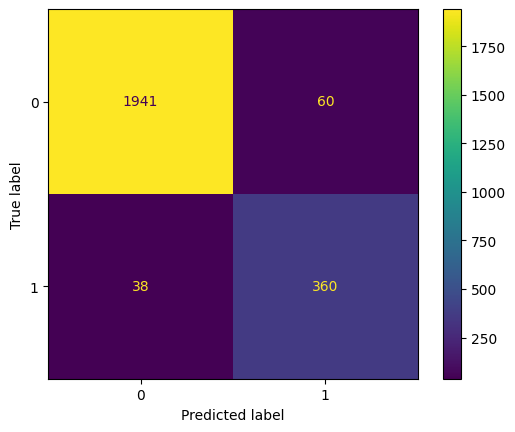

In [ ]:
# Generate array of values for confusion matrix

cm = confusion_matrix(y_test, rf_pred, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_cv.classes_)
disp.plot()

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

### **Decision Tree Splits**

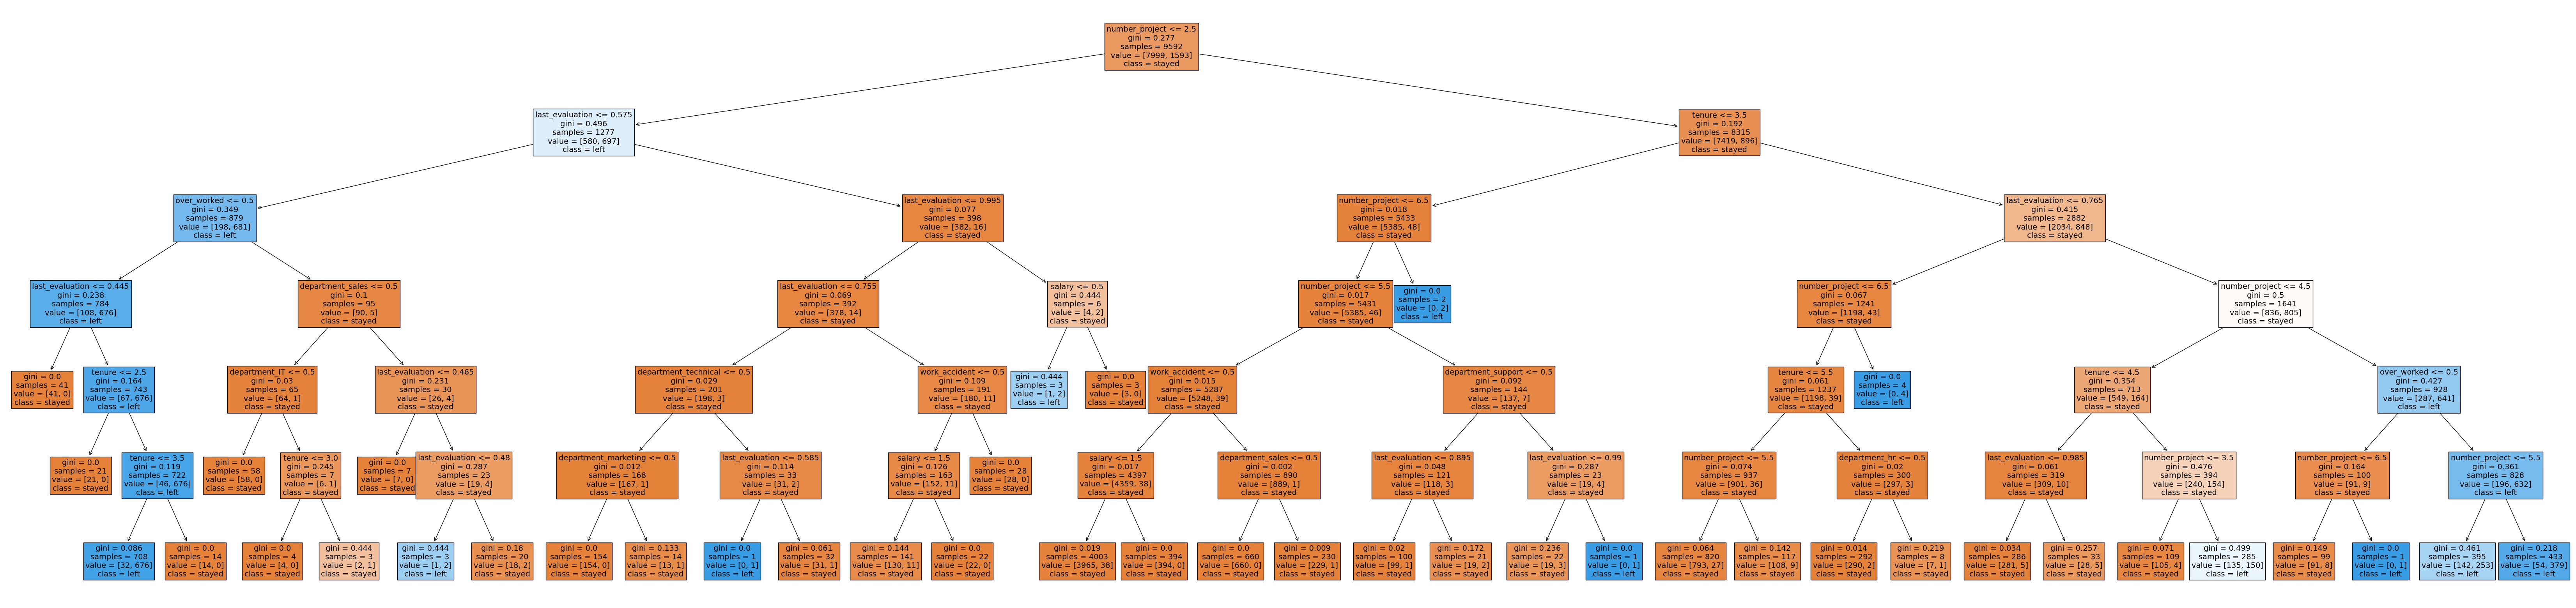

In [ ]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree_cv.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### **Decision Tree Feature Importance**

In [ ]:
#extract the importance features
tree2_importances = pd.DataFrame(tree_cv.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=x.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.345247
last_evaluation,0.340673
tenure,0.213109
over_worked,0.098842
salary,0.000839
department_support,0.000443
department_sales,0.000297
work_accident,0.000155
department_IT,0.000131
department_hr,0.000112


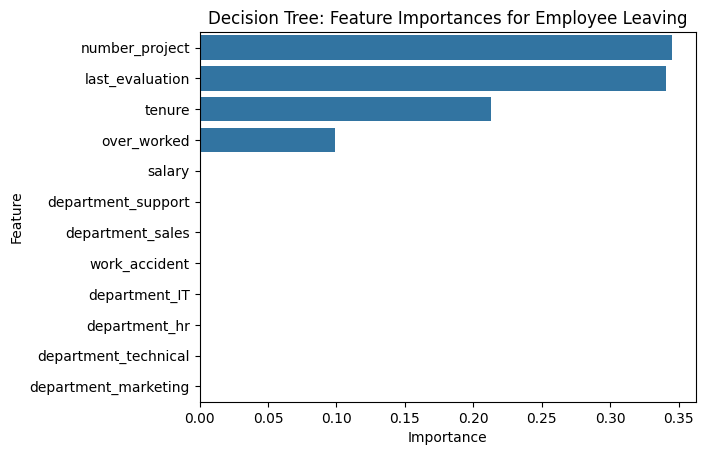

In [ ]:
#barplot which depict the important features
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

### Random Forest Feature Importance

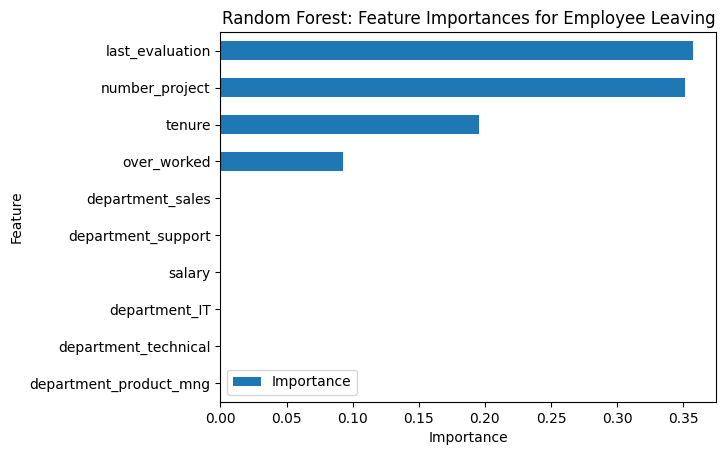

In [ ]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = x.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and overworked have the 9h-ighest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

# **pacE: Execute Stage**
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## **Evaluation metrics**

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## **Step 4. Results and Evaluation**
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### **Summary of model results**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

After conducting feature engineering, the random forest model achieved ruc_auc score  of 93.72%, precision of 95.91%, recall of 85.71%, f1-score of 90.45%, and accuracy of 88.01%, on the test set. The random forest modestly outperformed the decision tree model.

### **Conclusion, Recommendations, Next Steps**

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees:

* Capping the number of projects an employee can work on can be an effective way to manage workload, prevent burnout, and ensure quality work.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Give care to the employees from 3 year to 5 year and provide promotions by analysing their performance
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
*  Promote a healthy work-life balance through initiatives like flexible working hours, remote work options, and sufficient time off.
